# Problem set 2: Counting words

## Description

The goal of this problem set is to create the world's least visually-sophisticated word count graphic.

Along the way, you'll experiment with stopword removal, case folding, and other processing steps.

## Count words, naïvely

We'll work with *Moby-Dick*, as we did in class.

**Read the text of *Moby-Dick* from a file (it's on the class GitHub site, in the `data/texts` directory), tokenize it with NLTK's `word_tokenize` function, and count the resulting tokens in a `Counter` object.**

You can refer to the lecture notebook from Monday, September 7, to borrow code to do all of this. But you must get that code working in the cell below. This cell should produce a `Counter` object that holds the token counts from the novel.

In [9]:
# Use standard Python file commands to open Moby-Dick,
#  then count the words in that file.
from nltk.tokenize import word_tokenize
from collections import Counter

moby_dick_file_path = "../../data/texts/A-Melville-Moby_Dick-1851-M.txt"
with open(moby_dick_file_path) as f:
    contents = f.read()
    word_tokens = word_tokenize(contents)
    word_cnt = Counter(word_tokens)
    word_stats(word_cnt)

Number of words:  20638
20 most frequently occuring words: 
,: 19204
the: 13715
.: 7430
of: 6513
and: 6010
a: 4546
to: 4515
;: 4173
in: 3909
that: 2981
his: 2459
it: 2205
I: 2121
!: 1767
's: 1731
is: 1722
--: 1714
he: 1660
with: 1659
was: 1640


**Print the total number of words (hint: use `Counter`'s `.values()` method, along with the `sum` function) in your text, as well as the 20 most frequently occurring terms and their counts.**

We'll do this a lot, so wrap it up as a function that takes as input a `Counter` object and an optional number of top terms to print:

```
def word_stats(data, n=20):
```

The output of your fuction should look like this:

```
Total words in the text: 255380

Top 20 words by frequency:
,      19204
the    13715
.      7432

[and so on ...]
```

In [8]:
# Your word_stats function here
def word_stats(data, n=20):
    '''
    Print total wordcount and n top terms.
    Takes a Counter object and a number of terms to print.
    Returns None.
    '''
    print("Number of words: ",len(data))
    print("20 most frequently occuring words: ")
    for word, count in data.most_common(n):
        print('%s: %d' % (word, count))

In [ ]:
# Call word_stats on your data
word_stats(...)

## Case folding and stopwords

As you can see, the top words that we counted aren't super informative. That said, list two things that you **can** say about the text with reasonable confidence on the basis of our results above:

**Two things you *can* tell about *Moby-Dick* from the naïve word counts:**

1. Most of the frequent words are the stop words and punctuations
1. Multiple counts are split due to lower and upper case differences in naive word tokenization

If we want our word list to be informative, we need to find a way to ignore high-frequency, low-information words. We can do this either by not counting them in the first place, or by excluding them from our reporting after we've collected them. Both methods have advantages and drawbacks. The one you pursue is up to you.

**Modify the original code to ignore token case (e.g., 'The' and 'the' are both counted as occurrences of the same token; note the `.lower()` method for strings) and to remove the English-language stopwords defined by NLTK (`from nltk.corpus import stopwords`). Then display the total token count and top-20 tokens.**

In [11]:
# Count tokens with case folding and NLTK English stopwords removed
import string
from nltk.corpus import stopwords
low_words =  set(stopwords.words('english') + list(string.punctuation))

from nltk.tokenize import word_tokenize
from collections import Counter

moby_dick_file_path = "../../data/texts/A-Melville-Moby_Dick-1851-M.txt"
with open(moby_dick_file_path) as f:
    contents = f.read().lower()
    word_tokens = word_tokenize(contents)
    word_tokens_updated = []
    for word in word_tokens:
        if (word not in low_words) and word.isalpha():
            word_tokens_updated.append(word)
    word_cnt = Counter(word_tokens_updated)
    word_stats(word_cnt)

Number of words:  16385
20 most frequently occuring words: 
whale: 1096
one: 913
like: 580
upon: 565
ahab: 511
man: 498
ship: 469
old: 443
ye: 439
would: 436
sea: 384
though: 383
yet: 344
time: 326
captain: 325
long: 318
still: 312
said: 305
great: 303
boat: 291


Is this better? Maybe! **Note one advantage of this stopword-removed count, as well as one disadvantage:**

**Advantage:**

* Low information words have been removed

**Disadvantage:**

* Words not unique or important to the novel and its theme are still more frequent. Also tenses of words are counted as different words.

Let's see if we can further improve/refine our approach to continue narrowing our word list. Our goal is to produce a list that contains *only* interesting words and ranks them by frequency.

**List at least two ideas for modifying the stopword list to better approach our goal:**

1. Stemming and Lemmetisation
1. Idea two

**Implement one or more of your ideas to improve the stopword list, then display the output of your new version using `word_stats()`.**

In [15]:
# Better stopwords in action!
import string
from collections import Counter
from nltk.corpus import stopwords
low_words =  set(stopwords.words('english') + list(string.punctuation))

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

moby_dick_file_path = "../../data/texts/A-Melville-Moby_Dick-1851-M.txt"
with open(moby_dick_file_path) as f:
    # ps = PorterStemmer()
    snow_stemmer = SnowballStemmer(language='english')
    contents = f.read().lower()
    word_tokens = word_tokenize(contents)
    word_tokens_updated = []
    for word in word_tokens:
        if (word not in low_words) and word.isalpha():
            rootWord = snow_stemmer.stem(word)
                # ps.stem(word)
            # print(word, " ", rootWord)
            word_tokens_updated.append(rootWord)
    word_cnt = Counter(word_tokens_updated)
    word_stats(word_cnt)


Number of words:  9942
20 most frequently occuring words: 
whale: 1478
one: 933
like: 594
upon: 565
ship: 564
man: 512
ahab: 512
seem: 472
sea: 471
old: 443
time: 441
ye: 439
would: 436
boat: 435
though: 383
hand: 350
captain: 347
yet: 344
head: 340
look: 330


Refine your stoplist until you're satisfied with it. Make sure your code above displays the final output of your `word_stats` function. Then move on.

# Visualization

Now, make the world's least visually-impressive word count graphic. Your task is to produce a visual representation of your top 10 words that shows the relative frquency of those terms.

The simplest acceptable version of this visualization is a bar chart. **Complete the starter code below to produce a bar chart of the top ten words in the text.**

Your output might look like this:

![bar chart](ps_02_bar_chart.png)

[('whale', 1478), ('one', 933), ('like', 594), ('upon', 565), ('ship', 564), ('man', 512), ('ahab', 512), ('seem', 472), ('sea', 471), ('old', 443)]


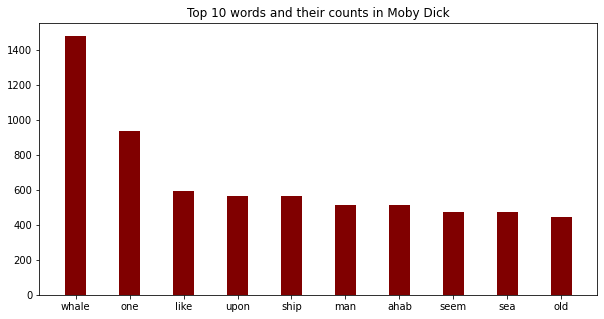

In [18]:
# Make a bar chart of the top 10 words
%matplotlib inline
import matplotlib.pyplot as plt

top10 = word_cnt.most_common(10)
print(top10)
# Get labels and counts
labels = [ w for w, c in top10]
counts = [ c for w, c in top10]

# Create the figure
# fig, ax = plt.subplots()
# ax.barh(...)
# ...

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, counts, color ='maroon',
        width = 0.4)

plt.title("Top 10 words and their counts in Moby Dick")
plt.show()

## Optional: word clouds

**This is optional.** Make a word cloud. You can do this the ugly way in pure `matplotlib` or the easy-and-pretty way by using the [`wordcloud`](https://github.com/amueller/word_cloud) library:

```
conda install -c conda-forge wordcloud
```
If you use `wordcloud`, you'll be interested in the [`.generate_from_frequencies()` method](http://amueller.github.io/word_cloud/auto_examples/frequency.html).

Here are examples of the ugly and the pretty outputs. Your specific results might vary.

![ugly](ps_02_ugly_cloud.png)
![pretty](ps_02_pretty_cloud.png)

In [ ]:
# The ugly way (matplotlib)
# Hint: you'll want to use the .text() plotting method
# Strictly optional

In [24]:
# The pretty way
# Strictly optional
from PIL import Image
print("here-")
from wordcloud import WordCloud
print("here0")
import matplotlib.pyplot as plt
print("here1")
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(word_cnt)
print("here2")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

here-


ImportError: cannot import name 'ImageDraw' from 'PIL' (/Users/subbulakshmi/opt/anaconda3/envs/nlp_csl/lib/python3.8/site-packages/PIL/__init__.py)